In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
ls


 Volume in drive C is OS
 Volume Serial Number is 267A-0770

 Directory of C:\Users\HP\Ass-5 MLR

10-07-2022  23:13    <DIR>          .
10-07-2022  23:13    <DIR>          ..
10-07-2022  01:37    <DIR>          .ipynb_checkpoints
04-07-2022  01:30             2,436 50_Startups.csv
04-07-2022  01:48             2,438 50_Startups-1.csv
10-07-2022  23:13         1,697,435 Ass-5 MLR- Toyota Corola.ipynb
04-07-2022  02:54           489,695 Ass-5 MLR-50_Startups.ipynb
04-07-2022  01:30           224,041 ToyotaCorolla.csv
               5 File(s)      2,416,045 bytes
               3 Dir(s)  51,563,061,248 bytes free


In [3]:
data = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data.sample(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
552,556,TOYOTA Corolla 1.6 VVT-i Linea Sol 4/5-Doors,12950,49,8,2000,41636,Petrol,110,1,...,1,1,1,1,0,0,0,0,1,1
1164,1170,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stati...,8950,73,8,1998,97494,Petrol,110,1,...,1,1,1,0,0,1,1,0,0,0
123,125,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,18950,20,1,2003,39115,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,1
1188,1195,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-D...,7950,71,10,1998,90370,Petrol,86,1,...,0,0,1,0,0,1,1,1,0,0
100,101,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,18990,20,1,2003,23175,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data1 = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)

In [7]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data2= data1.rename({'Age_08_04':'Age','Quarterly_Tax':'tax','cc':'CC'},axis=1)
data2

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
data3=data2.drop_duplicates().reset_index(drop=True)
data3.head()

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
data3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [12]:
data3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


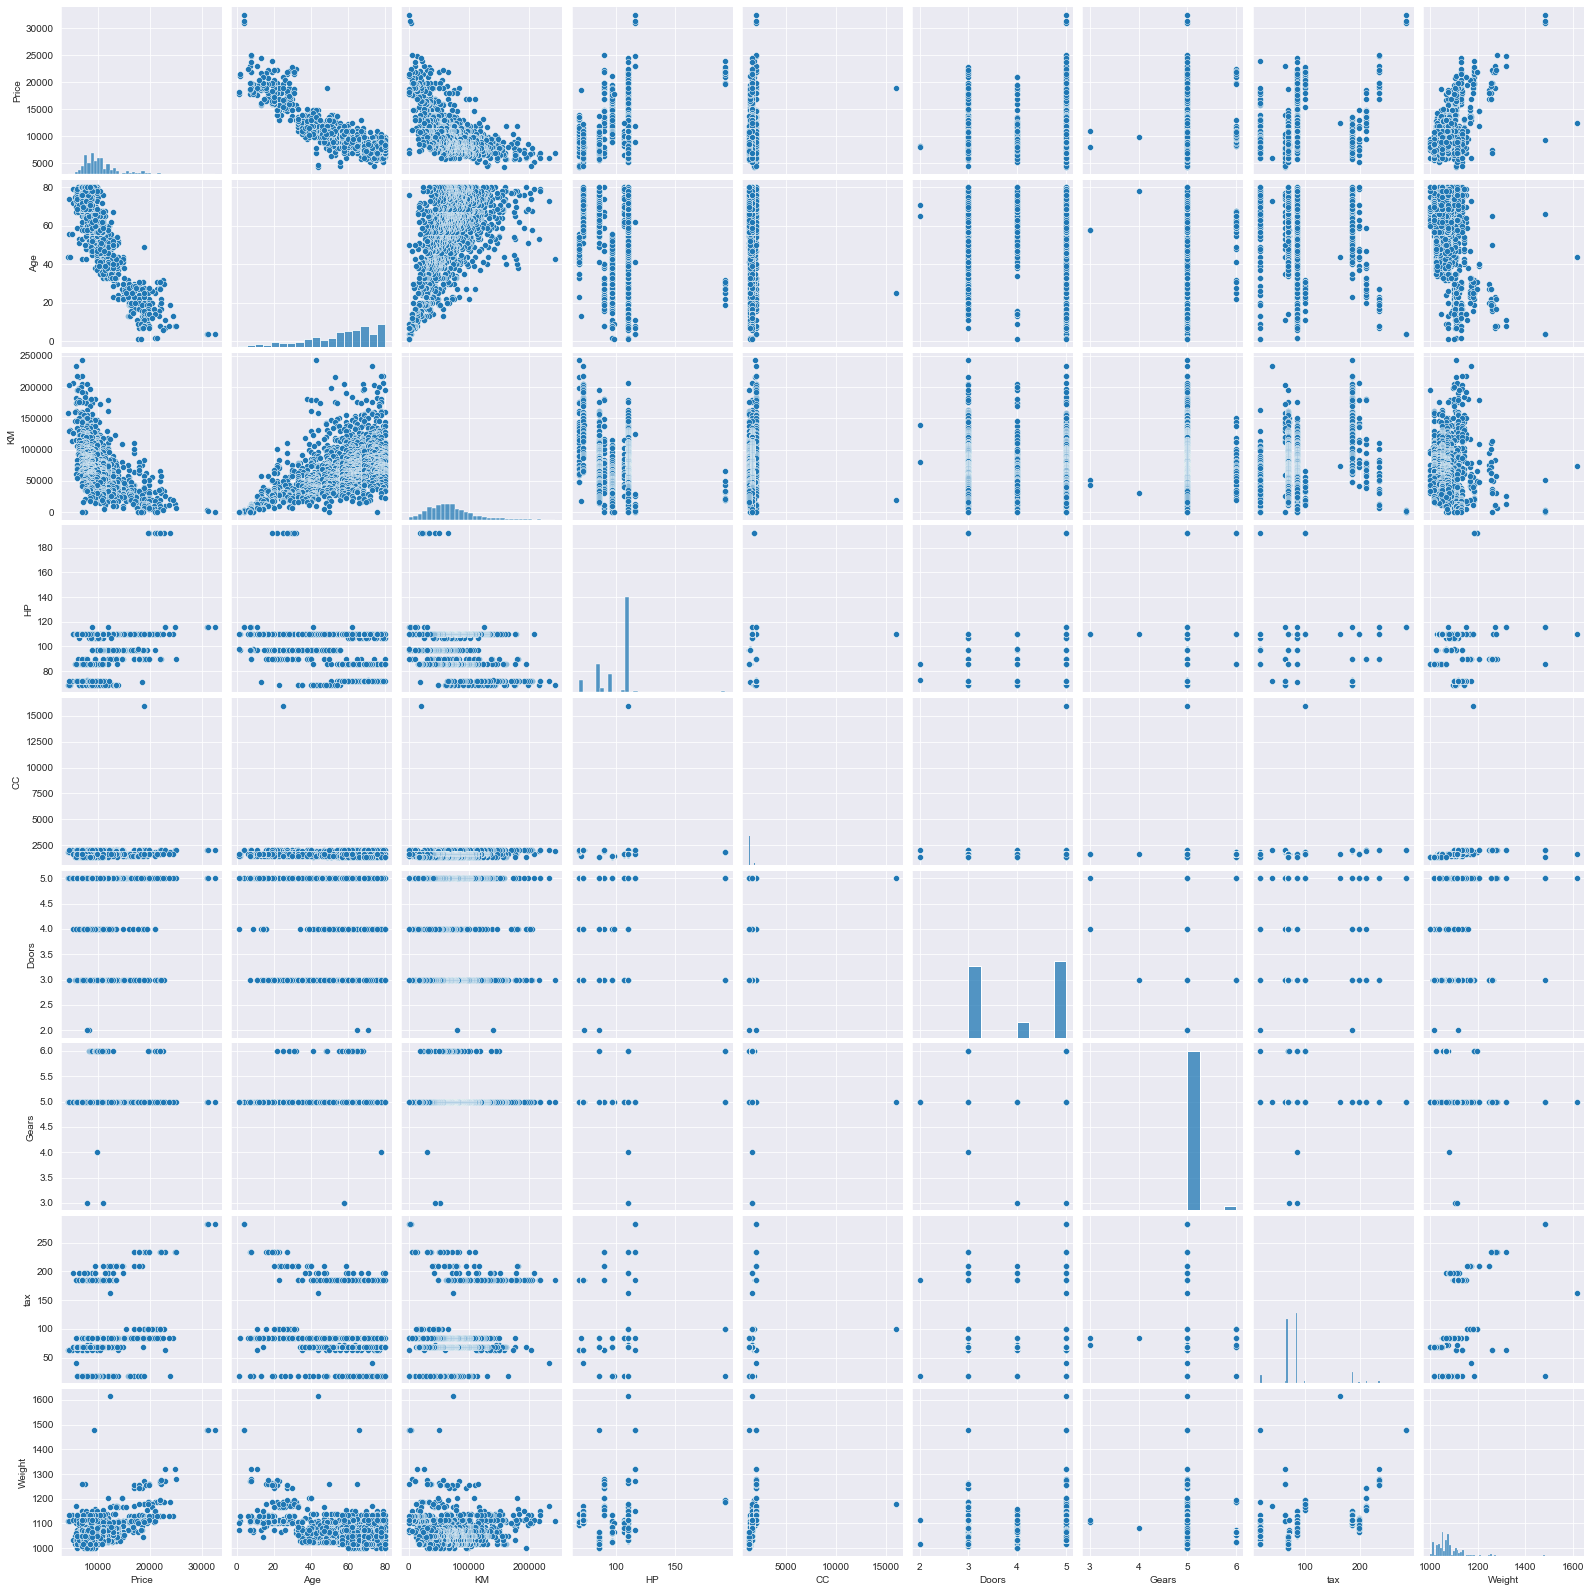

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

In [14]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+tax+Weight',data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:14:35   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Doors and CC are having high p-values so we will build SLR and MLR model for them separately and see

In [15]:
model1=smf.ols('Price~CC',data=data3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.29e-06
Time:                        23:14:36   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model2=smf.ols('Price~Doors',data=data3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.40e-12
Time:                        23:14:36   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model3=smf.ols('Price~CC+Doors',data=data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.55e-15
Time:                        23:14:36   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation by VIF:-


In [18]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC = smf.ols('CC~Age+HP+KM+Doors+Gears+tax+Weight',data=data3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors = smf.ols('Doors~Age+HP+CC+KM+Gears+tax+Weight',data=data3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+CC+Doors+KM+tax+Weight',data=data3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_tax = smf.ols('tax~Age+HP+CC+Doors+Gears+KM+Weight',data=data3).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_Weight = smf.ols('Weight~Age+HP+CC+Doors+Gears+tax+KM',data=data3).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

df={'Variables':['Age','KM','HP','CC','Doors','Gears','tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_tax,vif_Weight]}
Vif_df=pd.DataFrame(df)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,tax,2.295375
7,Weight,2.487180


None of the VIF is Greater than 20 so there is no collinearity problem, hence consideration of all the variables in model

# Cooks Distance

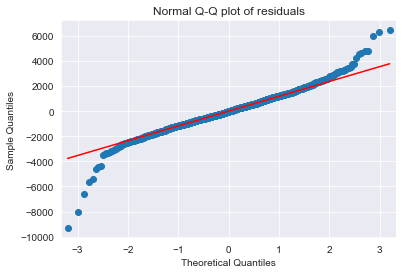

In [19]:
sm.qqplot(model.resid,line='q') # q=45
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [21]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

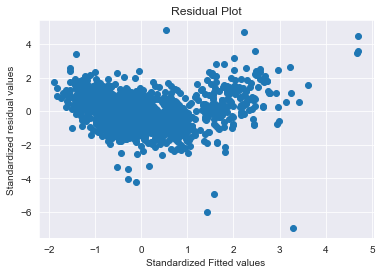

In [22]:
def standard_val(vals) : return (vals-vals.mean())/vals.std()
plt.scatter(standard_val(model.fittedvalues),
            standard_val(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressor

eval_env: 1


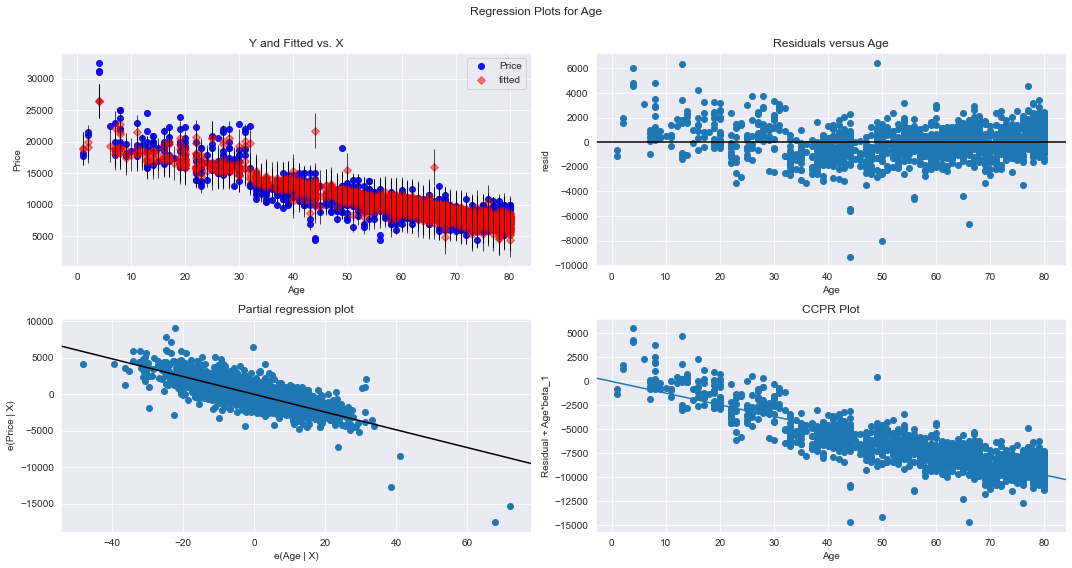

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


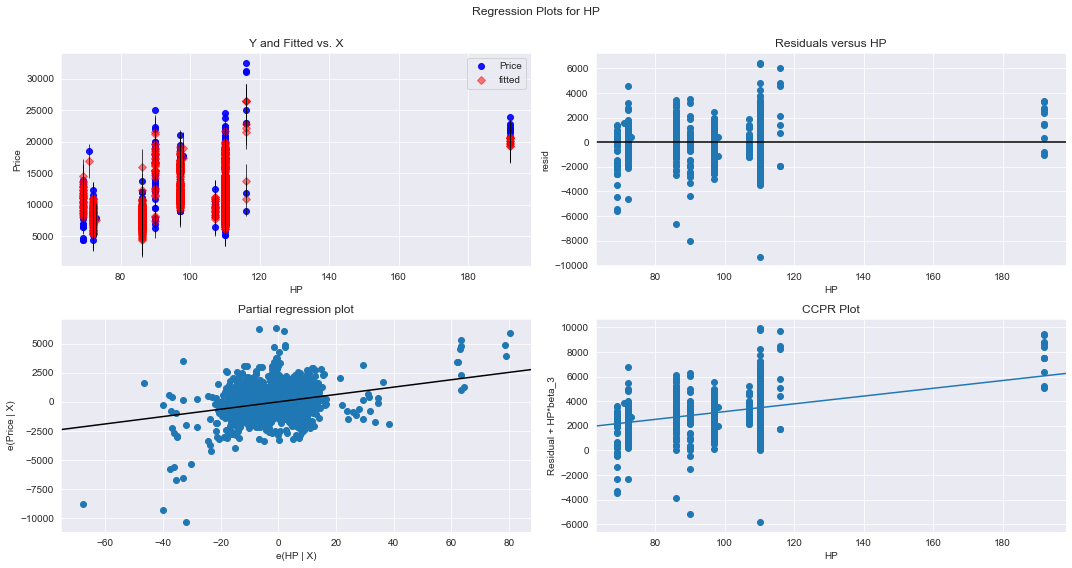

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


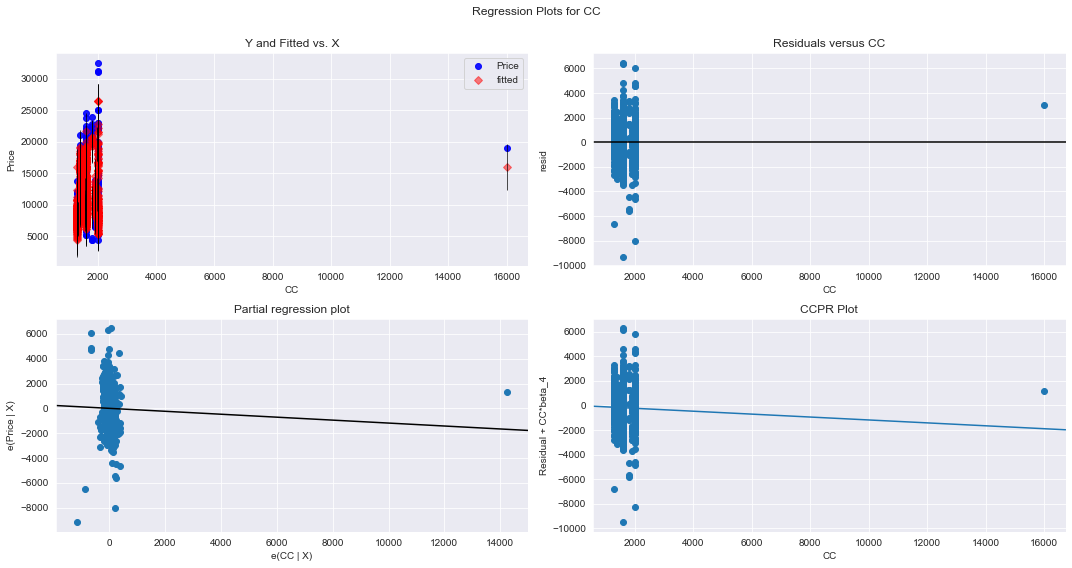

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


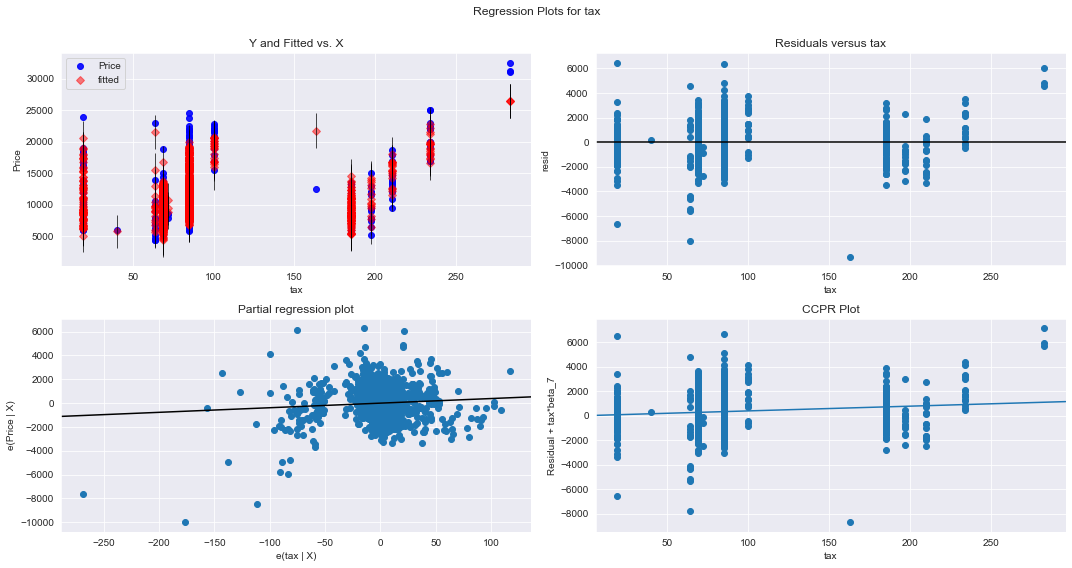

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

eval_env: 1


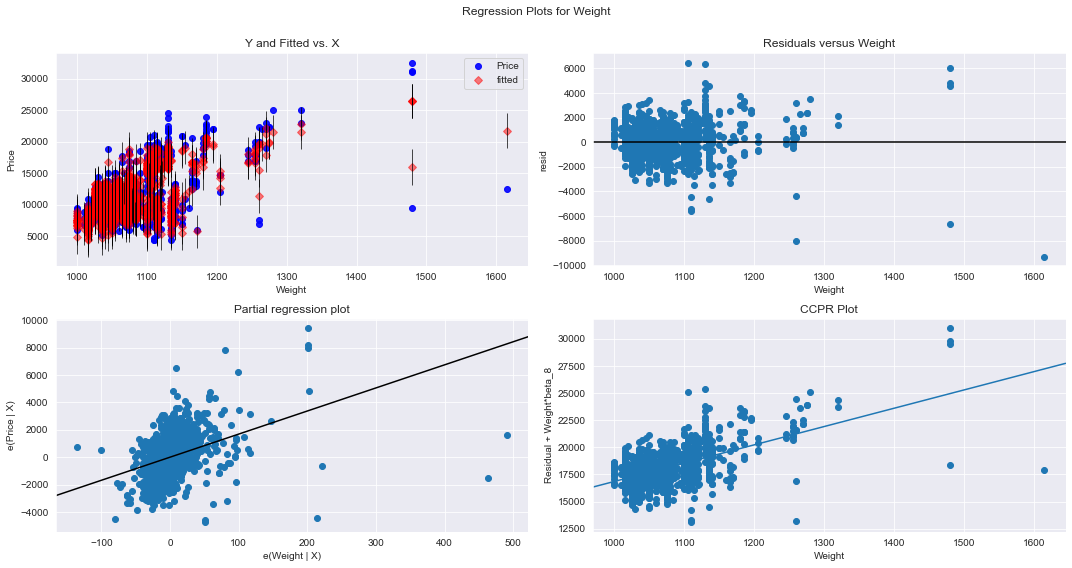

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1


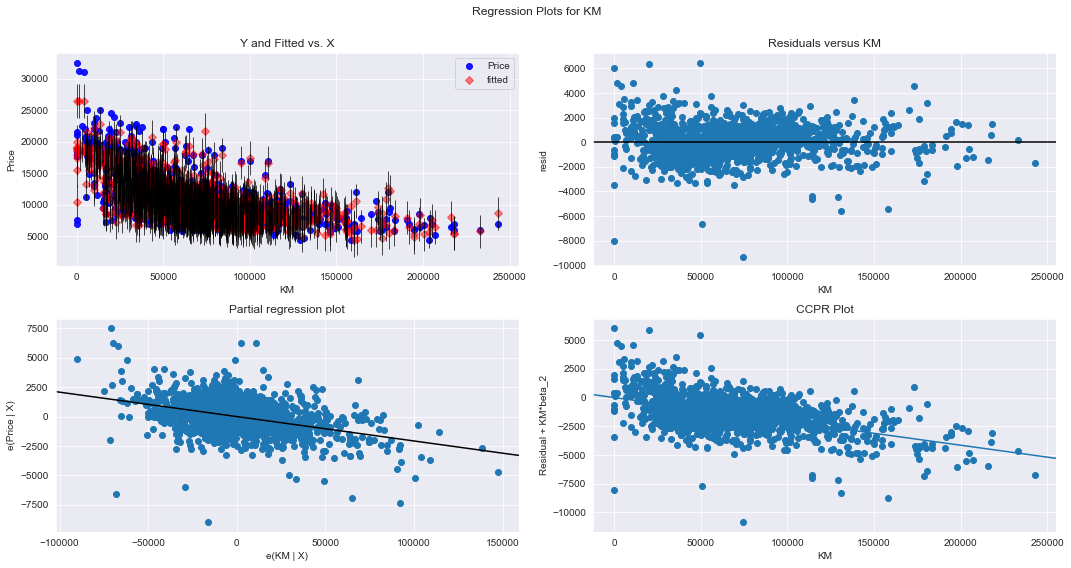

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


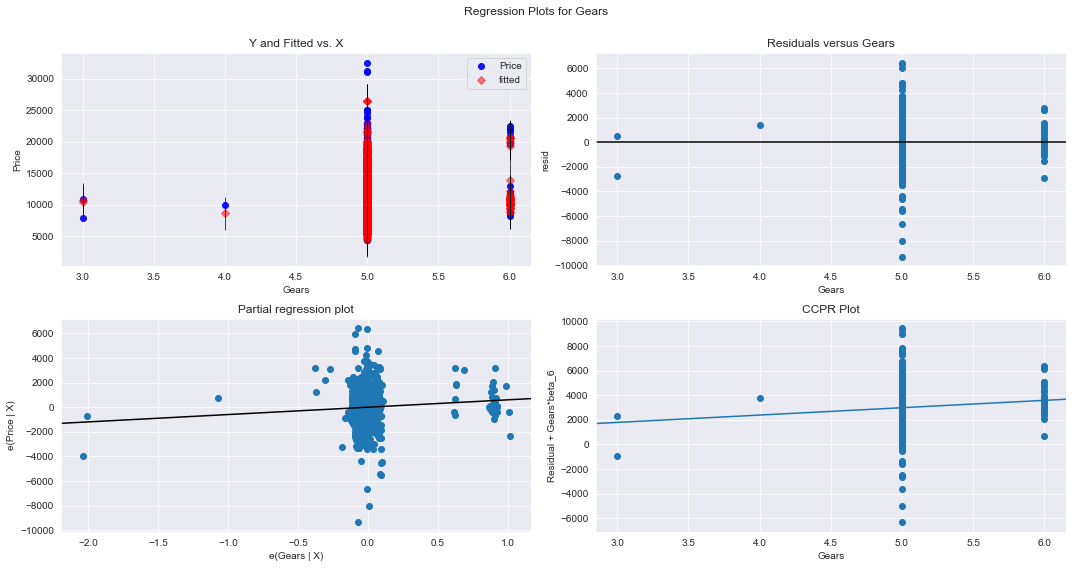

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


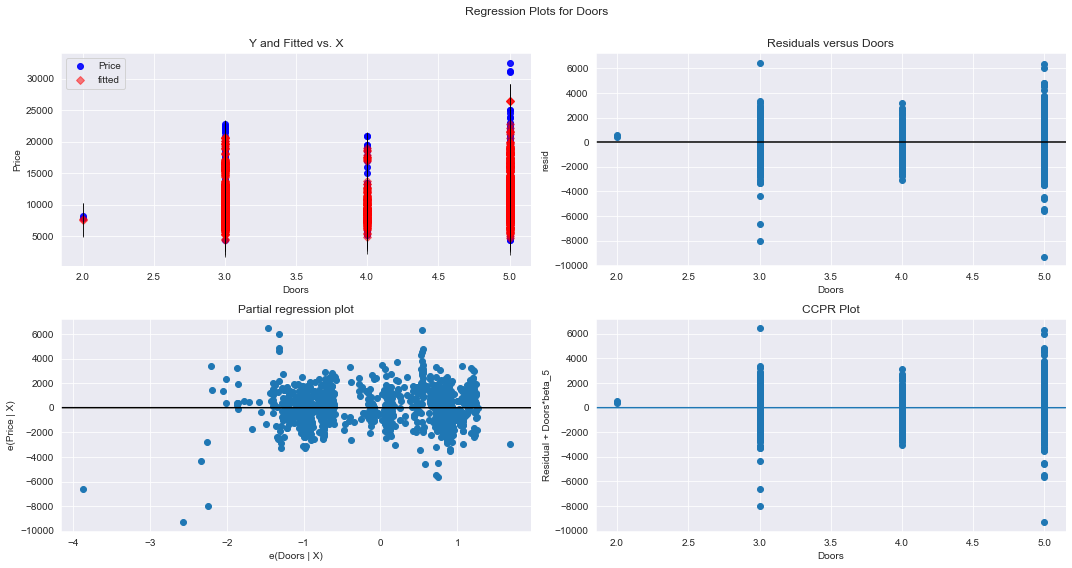

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

In [31]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

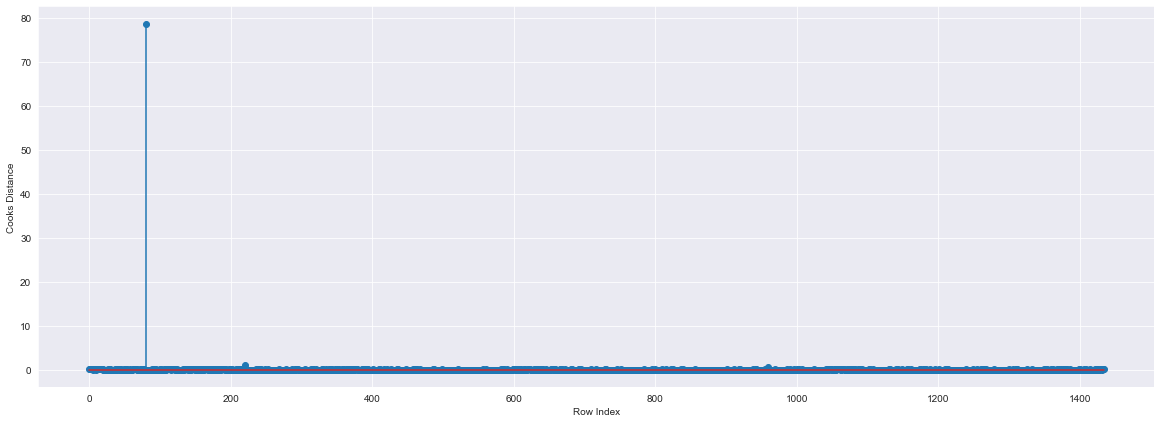

In [33]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
np.max(c) , np.argmax(c)

(78.7295058224916, 80)

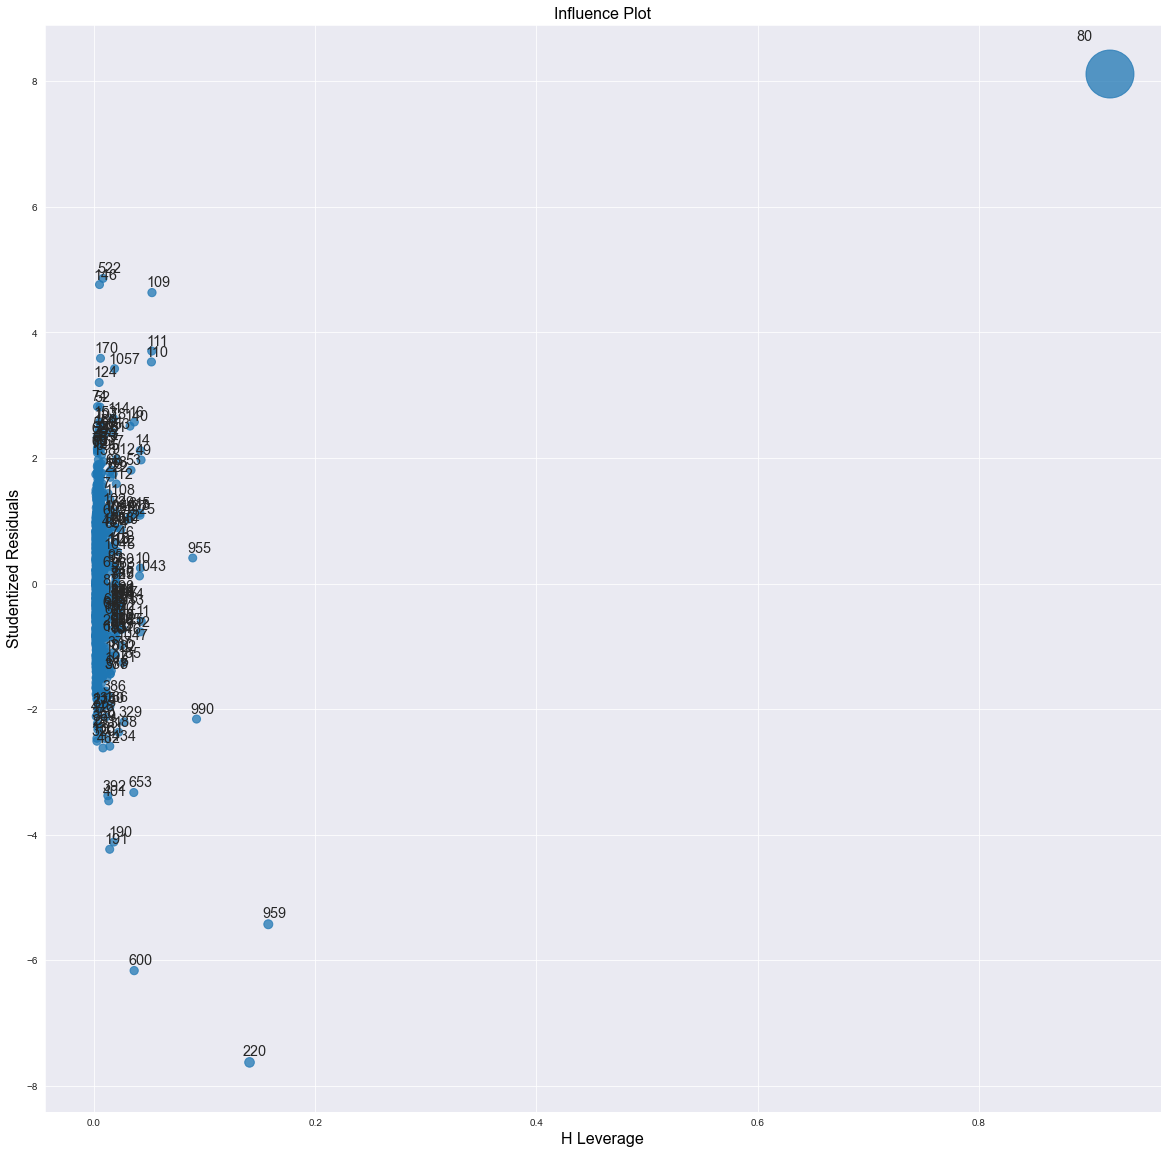

In [37]:
fig,ifp=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ifp)

In [38]:
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [39]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [40]:
data4 = data3.copy()
data4

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [41]:
data5 = data4.drop(data4.index[[80]],axis=0).reset_index(drop=True)
data5.head()

,Price,Age,KM,HP,CC,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [42]:
while model.rsquared< 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+tax+Weight',data=data5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data5 = data5.drop(data5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data5
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+tax+Weight',data=data5).fit()
        final_model.rsquared , final_model.aic
        print("Model accuracy improved to", final_model.rsquared)

Model accuracy improved to 0.8765926307402282
Model accuracy improved to 0.8839684606741538
Model accuracy improved to 0.8882395145171204
Model accuracy improved to 0.8902571486612915
Model accuracy improved to 0.8909888960319987
Model accuracy improved to 0.8922595280462808
Model accuracy improved to 0.8933621011392295
Model accuracy improved to 0.8947147371605556
Model accuracy improved to 0.8955233405057648
Model accuracy improved to 0.8930210061069088
Model accuracy improved to 0.8939546425147169
Model accuracy improved to 0.8954112430715817
Model accuracy improved to 0.8960182592139028
Model accuracy improved to 0.8968403506948497
Model accuracy improved to 0.8964026771830705
Model accuracy improved to 0.8958538146890626
Model accuracy improved to 0.8953750500147551
Model accuracy improved to 0.8949455651565242
Model accuracy improved to 0.8960864004304145
Model accuracy improved to 0.8955820765034092
Model accuracy improved to 0.8930233902806168
Model accuracy improved to 0.89038

In [44]:
final_model.rsquared

0.9003762532318559